# HW 9 - Tim Demetriades
11/7/2021

#### 1. Use the posted Python Code file to test MNIST image data: "EE628A_autoEncoder_demo.py". Test if you can obtain the decoded images and show them properly. 

#### 2. Use different epoch size from 5, 10, 20, 30, 40, 50, 100 and test the same code. 

#### 3. Use different number of layers of the deep networks (2, 3, 4, 5) and compare the performances.  

#### 4. Use auto encoder to find anomaly images:

#### 4.a You randomly download a few images other than the MNIST image dataset. For example, animals, furnitures, automobiles, etc.

#### 4.b Reform these images to a grayscale images without color channels (similar to the minist dataset).  

#### 4.c Use the above auto encoder to predict these download and reformed grayscale images. Show how much differences between the input images and the reconstructed after auto-encoder images.

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
# this is the size of our encoded representations
encoding_dim = 32    # 32 floats -> compression of factor 24.5, assuming the input is 784 floats (784 / 24.5 = 32)

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
# Configure the autoencoder model for training
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist
import numpy as np

In [8]:
# Get mnist train and test data (without the labels)
(x_train, _), (x_test, _) = mnist.load_data()

In [9]:
# change from ints to floats and normalize to between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [10]:
# reshape to 2D: 60,000 (num of images) by 28 times 28 = 784 (num of pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
autoencoder.save_weights('initial_weights.h5')

In [13]:
# train model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1)

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2775 - val_loss: 0.1905
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1721 - val_loss: 0.1551
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1462 - val_loss: 0.1363
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1309 - val_loss: 0.1235
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1203 - val_loss: 0.1150


In [14]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [16]:
# use matplotlib
import matplotlib.pyplot as plt

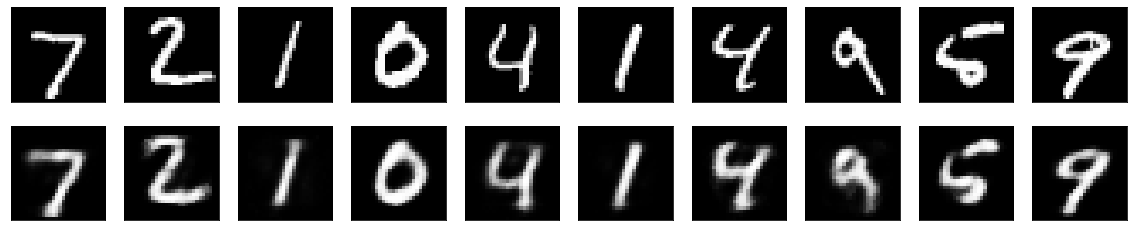

In [17]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

As can be seen in the images above, the model was able to accurately recreate the digits, albeit with some loss as expected - the recreated images are not as sharp as the original. The **validation loss** is pretty good to at **0.1150**, although this could be increased by increasing the number of epochs from 5. 

#### 2. Use different epoch size from 5, 10, 20, 30, 40, 50, 100 and test the same code. 

In [18]:
def alter_epochs(epochs):
    print(f"Run using {epochs} epochs:")
    # reset weights
    autoencoder.load_weights('initial_weights.h5')
    # train model
    history = autoencoder.fit(x_train, x_train,
                    epochs=epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)
    
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
    val_loss = history.history['val_loss'][-1]
    
    return val_loss

Run using 5 epochs:


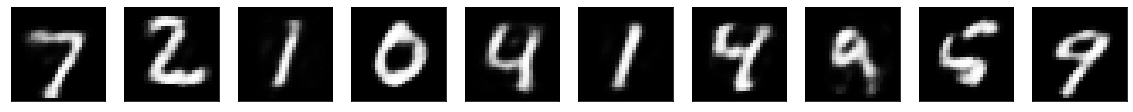

Run using 10 epochs:


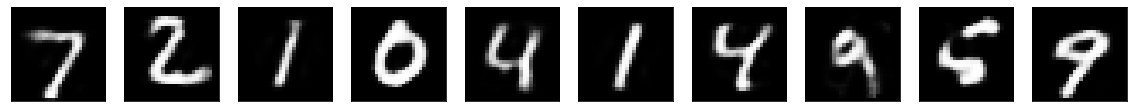

Run using 20 epochs:


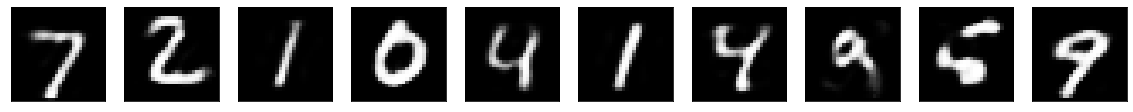

Run using 30 epochs:


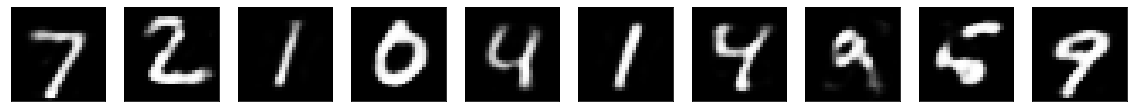

Run using 40 epochs:


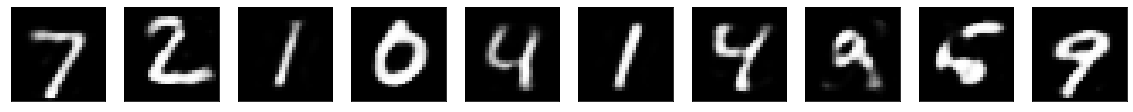

Run using 50 epochs:


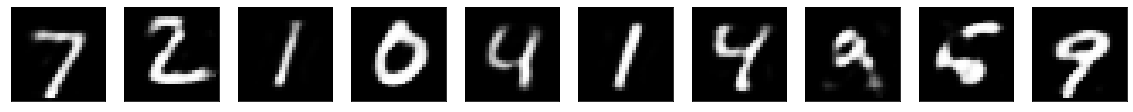

Run using 100 epochs:


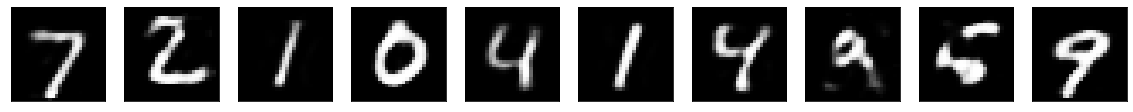

In [19]:
val_loss_list = []
epoch_list = [5, 10, 20, 30, 40, 50, 100]
for epoch in epoch_list:
    val_loss_list.append(alter_epochs(epoch))

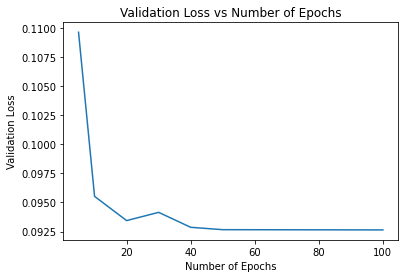

In [20]:
# Plot validation loss vs number of epochs
x_axis = epoch_list
y_axis = [val_loss_list[0], val_loss_list[1], val_loss_list[2], val_loss_list[3], val_loss_list[4], val_loss_list[5], val_loss_list[6]]

plt.xlabel('Number of Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Number of Epochs')

plt.plot(x_axis, y_axis)
plt.show()

Above we try increasing the epoch size, starting with 5 and going all the way to 100. As expected, as the epoch size increases, the loss decreases. When using only 5 epochs, the validation loss was **0.1150**, whereas when using 100 epochs, the validation loss improved to **0.0935**. As can be seen, only around 50 or so epochs are really needed, as the loss starts to level out around that point.

You could also see that the reconstructed images get closer to the original images as the number of epochs increases, with the higher epoch reconstructed images appearing to be **sharper** compared to the lower epoch reconstructed images.

Another thing we could try to alter is the number of layers.

#### 3. Use different number of layers of the deep networks (2, 3, 4, 5) and compare the performances.  

Below is a function to create the autoencoder, encoder, and decoder models given the number of layers, where the number of layers is the number of layers between the outer layers and the middle layer.

In [21]:
# Function to create models of varying layer sizes
def alter_layers(num_layers):
    encoding_size = 32
    input_img = Input(shape=(784,))
    
    # Layers
    
    # First layer
    encoded = Dense(128, activation='relu')(input_img)
    
    for layer in range(num_layers, 0, -1):    # ex: 3, 2, 1
        layer_size = (2 ** (layer + 5))
        if(layer == num_layers):    # if first layer
            encoded = Dense(layer_size, activation='relu')(input_img)
        else:
            encoded = Dense(layer_size, activation='relu')(encoded)
    
    # Middle layer
    encoded = Dense(32, activation='relu')(encoded)
    
    for layer in range(1, num_layers + 1):
        layer_size = (2 ** (layer + 5))
        if(layer == 1):    # if first layer
            decoded = Dense(layer_size, activation='relu')(encoded)
        else:
            decoded = Dense(layer_size, activation='relu')(decoded)
            
    # Last layer
    decoded = Dense(784, activation='sigmoid')(decoded)    
    
    # Models
    
    autoencoder = Model(input_img, decoded)
    
    encoder = Model(input_img, encoded)
    encoded_input = Input(shape=(encoding_size,))
    
    decoded_output = autoencoder.layers[-(num_layers + 1)](encoded_input)
    for layer in range(num_layers):
        decoded_output = autoencoder.layers[-(num_layers - layer)](decoded_output)
    
    decoder = Model(encoded_input, decoded_output)
    
    return autoencoder, encoder, decoder

In [22]:
# Create models with varying layers sizes
autoencoder1, encoder1, decoder1 = alter_layers(1)
autoencoder2, encoder2, decoder2 = alter_layers(2)
autoencoder3, encoder3, decoder3 = alter_layers(3)
autoencoder4, encoder4, decoder4 = alter_layers(4)

In [23]:
# Function to fit models, plot reconstructed images, and return validation loss
def fit_autoencoder(autoencoder, encoder, decoder):
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    history = autoencoder.fit(x_train, x_train,
                    epochs=5,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=0)
    
    # encode and decode some digits
    # note that we take them from the *test* set
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)
    
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
    val_loss = history.history['val_loss'][-1]
    
    return val_loss

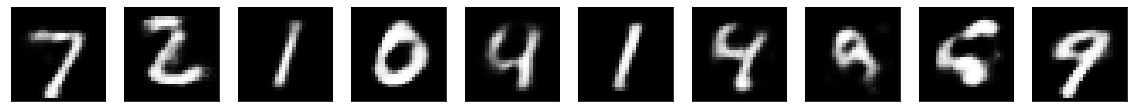

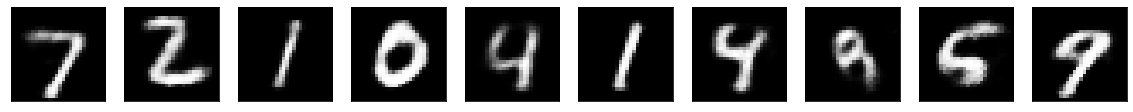

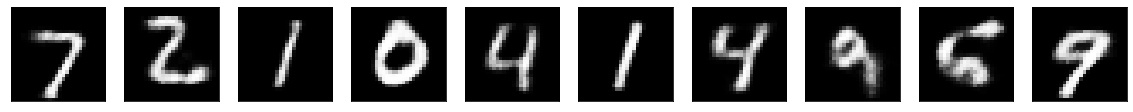

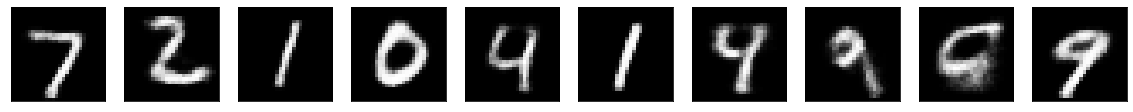

In [24]:
# Fit models, plot reconstructed images, and get validation loss
val_loss_list = []
val_loss_list.append(fit_autoencoder(autoencoder1, encoder1, decoder1))
val_loss_list.append(fit_autoencoder(autoencoder2, encoder2, decoder2))
val_loss_list.append(fit_autoencoder(autoencoder3, encoder3, decoder3))
val_loss_list.append(fit_autoencoder(autoencoder4, encoder4, decoder4))

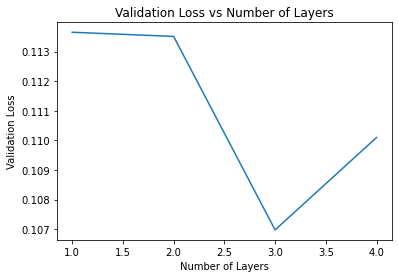

In [25]:
# Plot validation loss vs number of layers
x_axis = [1, 2, 3, 4]
y_axis = [val_loss_list[0], val_loss_list[1], val_loss_list[2], val_loss_list[3]]

plt.xlabel('Number of Layers')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Number of Layers')

plt.plot(x_axis, y_axis)
plt.show()

As can be seen from the above graph, there is not a linear relationship between the validation loss and the number of layers like there is with the validation loss and the epoch size. It seems that the model performs best when there are **3 layers**, meaning there is and input and output layer, a middle layer with 32 neurons, and 3 layers between the input layer and the middle layer and 3 layers between the middle layer and the output layer.

#### 4. Use auto encoder to find anomaly images:
##### 4.a You randomly download a few images other than the MNIST image dataset. For example, animals, furnitures, automobiles, etc.
##### 4.b Reform these images to a grayscale images without color channels (similar to the minist dataset).  
##### 4.c Use the above auto encoder to predict these download and reformed grayscale images. Show how much differences between the input images and the reconstructed after auto-encoder images.

In [99]:
import os, os.path
from PIL import Image, ImageOps

In [27]:
image_folder = r'random_images'
num_images = len([name for name in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, name))])

In [101]:
# Create list of images as pixel values
images = []
for i in range(num_images):
    file = os.listdir(image_folder)
    image_path = os.path.join(image_folder, file[i])
    image = Image.open(image_path)
    image = ImageOps.grayscale(image)
    images.append(image)

In [102]:
# Resize images to 28 x 28
size = (28, 28)
resized_images = []
for image in range(len(images)):
    resized_image = images[image].resize(size)
    resized_images.append(resized_image)

In [105]:
# Create numpy array of images
resized_images_array = []
for image in range(len(images)):
    resized_images_array.append(np.asarray(resized_images[image]).reshape(28 * 28))
resized_images_array = np.array(resized_images_array)

In [107]:
# Using PIL to display first 10 images
def visualize_images(images, cols, rows):
    visualize = Image.new('L', (256*cols, 256*rows))    # create base image big enough to hold top 10 images

    ct = 0
    row_inc = 0
    col_inc = 0

    for i in range(images.shape[0]):    # first column is num of images
        ct += 1
        img = Image.fromarray(images[i, :].reshape([28, 28]))    # each image (reshaped)
        img = img.resize((256, 256))
        visualize.paste(img, (col_inc, row_inc))    # put image in base image starting at top left
        col_inc += 256
        if ct % 5 == 0:    # after 5 images move down to next row
            row_inc += 256
            col_inc = 0
    return visualize

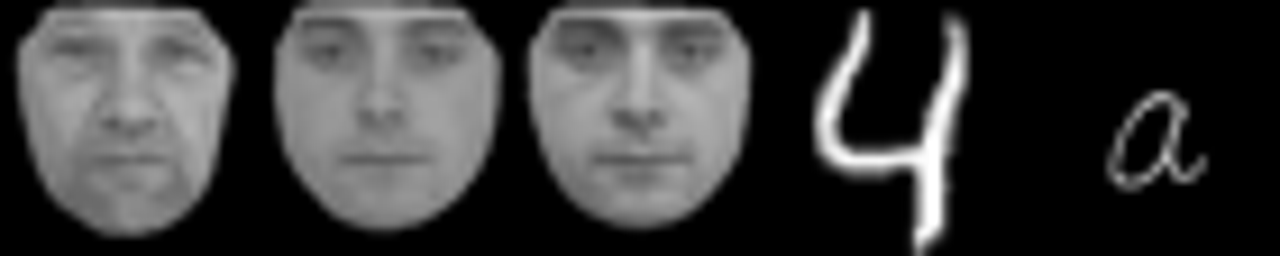

In [108]:
original_images = visualize_images(resized_images_array, cols=5, rows=1)
original_images

In [109]:
# Encode and decode the images
encoded_imgs = encoder4.predict(resized_images_array)
decoded_imgs = decoder4.predict(encoded_imgs)

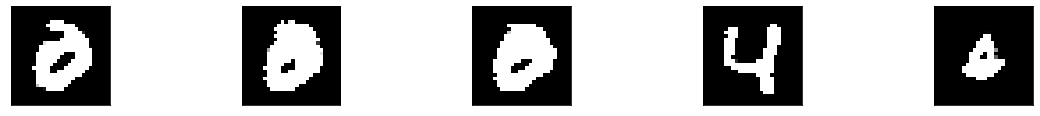

In [110]:
# Display the reconstructed images
n = 5  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Above you can see the results of the reconstruction using the 4 layer autoencoder model from the previous question. As you can see the model does a pretty bad job at reconstructing images that are not similar to the mnist dataset. When given face images, the model tries to reconstruct a face but ends up making something that looks more like a digit from the mnist dataset. 

However, when given new images that look like digits, specifically a 4 and a lowercase letter a, the model is able to do a much better job with the reconstruction, especially with the 4. This makes sense, as the model was trained on digits. 

This shows how the autoencoder model can be used for anomoly detection. One would just need to calcualte the difference (loss) between the original images and the reconstructed images. If the difference is high, an unexpected image was given to the model and an anomoly was detected, as with the case of the faces. However, if the difference is low, the reconstructed images are very similar to the original images and no anomolites are detected.